# MXNet LeNet Demo


In [1]:
import mxnet as mx
import numpy as np

RuntimeError: Cannot find the files.
List of candidates:
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\libmxnet.dll
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\../../lib/libmxnet.dll
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\../../build/Release/libmxnet.dll
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\../../build\libmxnet.dll
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\../../build\Release\libmxnet.dll
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\../../windows/x64\Release\libmxnet.dll

In [ ]:
# our parameters
train_data_pth = os.getcwd() + '/../data/train/'
validation_data_pth = os.getcwd() + '/../data/validation/'
log_pth = os.getcwd() + '/../data/logs/'
n_train_samples = 1800
n_validation_samples = 100
n_epochs = 3
batch_size = 20
n_classes = 4
img_width, img_height = 80, 80
input_shape = (img_width, img_height, 3)

In [326]:


# First, shuffle the data
shuffle = np.random.rand(allmat.shape[0]).argsort()
datarand = np.take(allmat,shuffle,axis=0)
labelrand = np.take(label,shuffle)

ntrain = int(allmat.shape[0]*0.8)
train_features = datarand[:ntrain, :]
train_labels = labelrand[:ntrain]
test_features = datarand[ntrain:, :]
test_labels = labelrand[ntrain:]

def to4d(img):
    if(len(img.shape) == 3):
        return img.reshape(img.shape[0], 1, img.shape[1], img.shape[2]).astype(np.float32)
    else:
        return img.reshape(1, 1, img.shape[0], img.shape[1]).astype(np.float32)

batch_size=100
train_iter = mx.io.NDArrayIter(to4d(train_features),train_labels , batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(to4d(test_features),test_labels , batch_size)

## Multilayer Perceptron

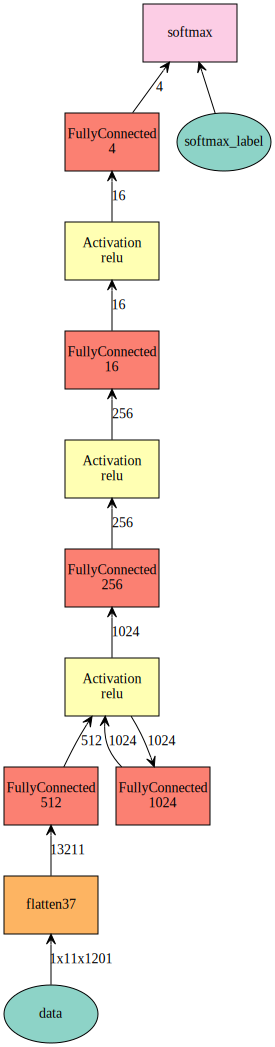

In [332]:
data = mx.sym.var('data')
# first conv layer
conv1 = mx.sym.Convolution(data=data, kernel=(5,5), num_filter=20)
tanh1 = mx.sym.Activation(data=conv1, act_type="tanh")
pool1 = mx.sym.Pooling(data=tanh1, pool_type="max", kernel=(2,2), stride=(2,2))
# second conv layer
conv2 = mx.sym.Convolution(data=pool1, kernel=(5,5), num_filter=50)
tanh2 = mx.sym.Activation(data=conv2, act_type="tanh")
pool2 = mx.sym.Pooling(data=tanh2, pool_type="max", kernel=(2,2), stride=(2,2))
# first fullc layer
flatten = mx.sym.flatten(data=pool2)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=512)
tanh3 = mx.sym.Activation(data=fc1, act_type="tanh")
# second fullc
fc2 = mx.sym.FullyConnected(data=tanh3, num_hidden=128)
# softmax loss
lenet = mx.sym.SoftmaxOutput(data=fc2, name='softmax')


In [333]:
# create a trainable module on CPU
lenet_model = mx.mod.Module(symbol=lenet, context=mx.cpu())

# train with the same
lenet_model.fit(train_iter,
                eval_data=val_iter,
                optimizer='sgd',
                optimizer_params={'learning_rate':0.1},
                eval_metric='acc',
                batch_end_callback = mx.callback.Speedometer(batch_size, 100),
                num_epoch=10)

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: mxnet.model.FeedForward has been deprecated. Please use mxnet.mod.Module instead.
/anaconda/envs/py35/lib/python3.5/site-packages/mxnet-0.9.5-py3.5.egg/mxnet/model.py:516: DeprecationWarning: Calling initializer with init(str, NDArray) has been deprecated.please use init(mx.init.InitDesc(...), NDArray) instead.
  self.initializer(k, v)
INFO:root:Start training with [gpu(0)]
INFO:root:Epoch[0] Resetting Data Iterator
INFO:root:Epoch[0] Time cost=0.350
INFO:root:Epoch[0] Validation-accuracy=0.412000
INFO:root:Epoch[1] Resetting Data Iterator
INFO:root:Epoch[1] Time cost=0.276
INFO:root:Epoch[1] Validation-accuracy=0.412000
INFO:root:Epoch[2] Resetting Data Iterator
INFO:root:Epoch[2] Time cost=0.180
INFO:root:Epoch[2] Validation-accuracy=0.412000
INFO:root:Epoch[3] Resetting Data Iterator
INFO:root:Epoch[3] Time cost=0.217
INFO:root:Epoch[3] Validation-accuracy=0.412000
INFO:root:Epoch[4] Resetti

Classified as 1 with probability 0.410985
Actual label: 2


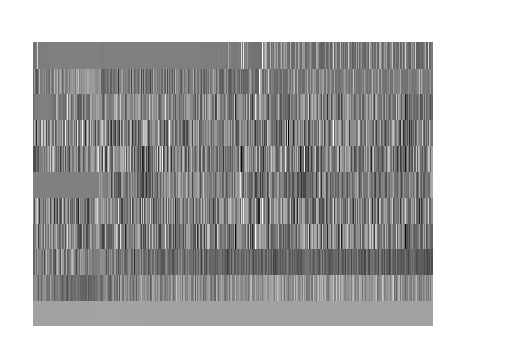

In [329]:
index=np.random.choice(datarand.shape[0])
plt.pcolor(datarand[index], cmap='gray')
plt.axis('off')

prob = model.predict(to4d(datarand[index]))[0]
#assert max(prob) > 0.99, "Low prediction accuracy."
print ('Classified as %d with probability %f' % (prob.argmax(), max(prob)))
print('Actual label: %d' % labelrand[index])



Accuracy Score: 0.4125


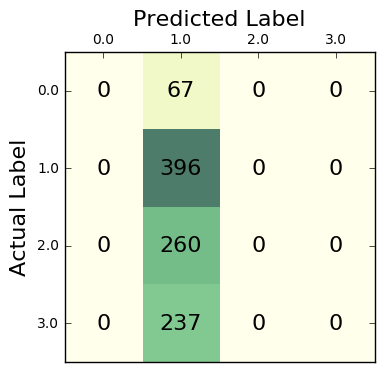

In [334]:
from sklearn.metrics import confusion_matrix


prob = model.predict(to4d(test_features))

y_pred = np.argmax(prob,axis=1)

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix,cmap=plt.cm.YlGn,alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)


cnf_matrix = confusion_matrix(test_labels, y_pred)
show_confusion_matrix(cnf_matrix,np.unique(labelrand))
acc_score = metrics.accuracy_score(test_labels, y_pred)

print("Accuracy Score: {}".format(acc_score))